In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = r"D:\SRM\Github codes\Datasets\Student academics project\StudentGradesAndPrograms.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,schoolyear,gradeLevel,classPeriod,classType,schoolName,gradePercentage,avid,sped,migrant,ell,student_ID
0,2024-2025,07,1,ELE,West Junior High,2000.0,Y,N,N,N,0HRJHI993
1,2024-2025,07,1,ELE,West Junior High,2000.0,N,N,N,N,CKN322II4
2,2024-2025,07,1,ELE,West Junior High,1950.0,N,N,N,N,V523OZUH8
3,2024-2025,07,1,ELE,West Junior High,1850.0,Y,N,N,N,OJDYS3434
4,2024-2025,07,1,ELE,West Junior High,1500.0,N,N,Y,Y,49RSM3UF6


In [2]:
df.isnull().sum()

schoolyear         0
gradeLevel         0
classPeriod        0
classType          0
schoolName         0
gradePercentage    0
avid               0
sped               0
migrant            0
ell                0
student_ID         0
dtype: int64

In [3]:
# Convert 'schoolyear' to a categorical type if necessary
df['schoolyear'] = df['schoolyear'].astype('category')

# Convert 'gradeLevel' to a categorical type
df['gradeLevel'] = df['gradeLevel'].astype('category')

# Convert 'classPeriod' to a categorical type
df['classPeriod'] = df['classPeriod'].astype('category')

# Convert 'classType' to a categorical type
df['classType'] = df['classType'].astype('category')

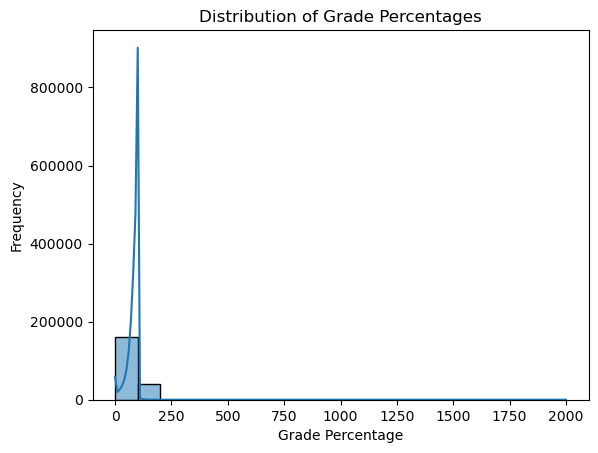

In [4]:
# Plot the distribution of grade percentages
sns.histplot(df['gradePercentage'], bins=20, kde=True)
plt.title('Distribution of Grade Percentages')
plt.xlabel('Grade Percentage')
plt.ylabel('Frequency')
plt.show()

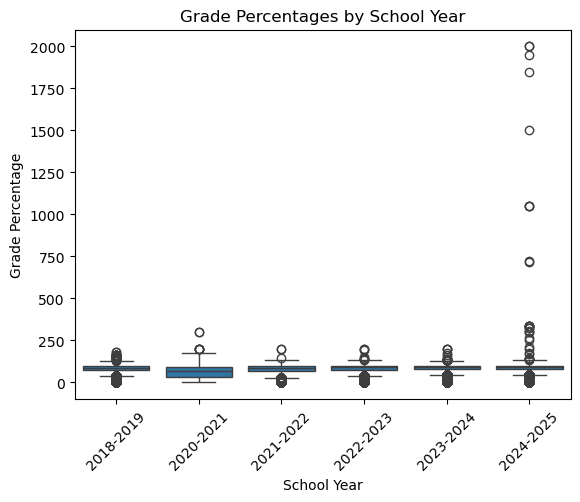

In [5]:
# Box plot of grade percentages by school year
sns.boxplot(x='schoolyear', y='gradePercentage', data=df)
plt.title('Grade Percentages by School Year')
plt.xlabel('School Year')
plt.ylabel('Grade Percentage')
plt.xticks(rotation=45)
plt.show()


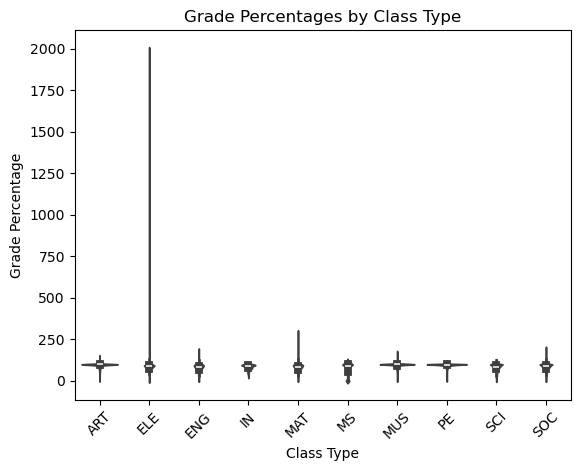

In [6]:
# Violin plot of grade percentages by class type
sns.violinplot(x='classType', y='gradePercentage', data=df)
plt.title('Grade Percentages by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Grade Percentage')
plt.xticks(rotation=45)
plt.show()


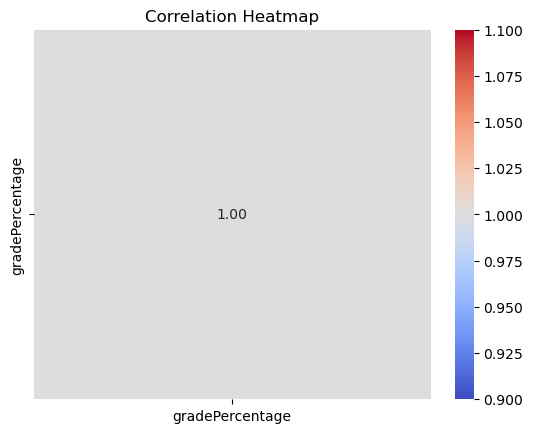

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data for modeling
X = pd.get_dummies(df.drop(['gradePercentage', 'student_ID'], axis=1))
y = df['gradePercentage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

329.8456103960848